Load packages

In [1]:
import keras
from keras.datasets import cifar10
from sklearn.model_selection import train_test_split
import numpy as np
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint
from matplotlib import pyplot as plt

Using TensorFlow backend.


Load dataset

In [2]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

Use *train_test_split* function random sample 20% of the training set

In [3]:
X_train, _, Y_train, _ = train_test_split(X_train, Y_train, test_size=0.8, random_state=42)

Normalize image vectors

In [4]:
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

Split the testing set into validation and testing

In [5]:
num_classes = len(np.unique(Y_train))
#
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)

X_valid = X_test[5000:]
Y_valid = Y_test[5000:]

X_test = X_test[:5000]
Y_test = Y_test[:5000]

Building MLP model

In [6]:
MLPModel = Sequential()

MLPModel.add(Flatten(input_shape = X_train.shape[1:]))
#Fully connected layer with 512 units and a sigmoid activation function
MLPModel.add(Dense(512, activation='sigmoid', input_shape = X_train.shape[1:]))
#Fully connected layer with 512 units and a sigmoid activation function
MLPModel.add(Dense(512, activation='sigmoid'))
#Output layer with softmax activation function and 10 neurons for the classification task
MLPModel.add(Dense(num_classes, activation='softmax'))

Compile the model using categorical_cross_entropy as the loss function as this is a multi classification problem

In [7]:
MLPModel.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

Train the model

In [8]:
history1 = MLPModel.fit(x = X_train, y = Y_train, validation_data=(X_valid, Y_valid), epochs = 5, batch_size = 32)

Train on 10000 samples, validate on 5000 samples
Epoch 1/5
10000/10000 [==============================] - 25s 3ms/step - loss: 2.0766 - accuracy: 0.2275 - val_loss: 1.9619 - val_accuracy: 0.2552
Epoch 2/5
10000/10000 [==============================] - 23s 2ms/step - loss: 1.9292 - accuracy: 0.2915 - val_loss: 1.8611 - val_accuracy: 0.3216
Epoch 3/5
10000/10000 [==============================] - 23s 2ms/step - loss: 1.8624 - accuracy: 0.3221 - val_loss: 1.8662 - val_accuracy: 0.3236
Epoch 4/5
10000/10000 [==============================] - 22s 2ms/step - loss: 1.7961 - accuracy: 0.3532 - val_loss: 1.8558 - val_accuracy: 0.3358
Epoch 5/5
10000/10000 [==============================] - 22s 2ms/step - loss: 1.7809 - accuracy: 0.3577 - val_loss: 1.7951 - val_accuracy: 0.3516


Plot the training and validation accuracies

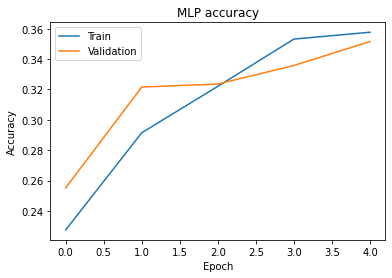

In [9]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('MLP accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Evaluate the model using testing set

In [10]:
preds = MLPModel.evaluate(x = X_test, y = Y_test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

5000/5000 [==============================] - 1s 218us/step
Loss = 1.7731433101654053
Test Accuracy = 0.365200012922287


Print the details of layers in a table with the sizes of its inputs/outputs

In [57]:
MLPModel.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 1,841,162
Trainable params: 1,841,162
Non-trainable params: 0
_________________________________________________________________


Building the first CNN model

In [58]:
CNN1Model = Sequential()
#2D Convolutional layer with 64 filters (size of 3x3) and ReLU activation function
CNN1Model.add(Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(32,32,3)))
#2D Convolutional layer with 64 filters (size of 3x3) and ReLU activation function
CNN1Model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
CNN1Model.add(Flatten())
#Fully connected (Dense) layer with 512 units and a sigmoid activation function
CNN1Model.add(Dense(512, activation='sigmoid'))
#Fully connected layer with 512 units and a sigmoid activation function
CNN1Model.add(Dense(512, activation='sigmoid'))
#Output layer with softmax activation function and 10 neurons for the classification task
CNN1Model.add(Dense(num_classes, activation='softmax'))

Compile the model using categorical_cross_entropy as the loss function as this is a multi classification problem

In [59]:
CNN1Model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Train the model

In [60]:
history2 = CNN1Model.fit(x = X_train, y = Y_train, validation_data=(X_valid, Y_valid), epochs = 5, batch_size = 32)

Train on 10000 samples, validate on 5000 samples
Epoch 1/5
10000/10000 [==============================] - 332s 33ms/step - loss: 1.7689 - accuracy: 0.3471 - val_loss: 1.5872 - val_accuracy: 0.4218
Epoch 2/5
10000/10000 [==============================] - 311s 31ms/step - loss: 1.3109 - accuracy: 0.5234 - val_loss: 1.3239 - val_accuracy: 0.5180
Epoch 3/5
10000/10000 [==============================] - 293s 29ms/step - loss: 0.9799 - accuracy: 0.6540 - val_loss: 1.4626 - val_accuracy: 0.5030
Epoch 4/5
10000/10000 [==============================] - 289s 29ms/step - loss: 0.5864 - accuracy: 0.7955 - val_loss: 1.5309 - val_accuracy: 0.5192
Epoch 5/5
10000/10000 [==============================] - 291s 29ms/step - loss: 0.2068 - accuracy: 0.9425 - val_loss: 1.6707 - val_accuracy: 0.5438


Plot the training and validation curves

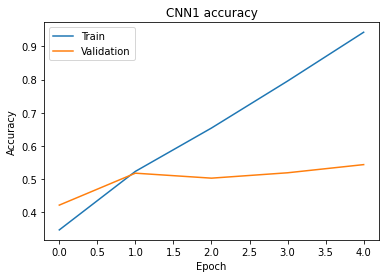

In [61]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('CNN1 accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Evaluate the model using testing set

In [62]:
preds = CNN1Model.evaluate(x = X_test, y = Y_test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

5000/5000 [==============================] - 13s 3ms/step
Loss = 1.6121914421081542
Test Accuracy = 0.5540000200271606


Print the details of layers in a table with the sizes of its inputs/outputs

In [63]:
CNN1Model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
flatten_21 (Flatten)         (None, 65536)             0         
_________________________________________________________________
dense_58 (Dense)             (None, 512)               33554944  
_________________________________________________________________
dense_59 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_60 (Dense)             (None, 10)                5130      
Total params: 33,861,450
Trainable params: 33,861,450
Non-trainable params: 0
_________________________________________

Building the second CNN model

In [27]:
CNN2Model = Sequential()
#2D Convolutional layer with 64 filters (size of 3x3) and ReLU activation function
CNN2Model.add(Conv2D(64, (3, 3), activation="relu", padding='same', input_shape=(32,32,3)))
#2x2 Max pooling layer
CNN2Model.add(MaxPooling2D(pool_size=2))
#2D Convolutional layer with 64 filters (size of 3x3) and ReLU activation function
CNN2Model.add(Conv2D(64, (3, 3), activation="relu", padding='same'))
#2x2 Max pooling layer
CNN2Model.add(MaxPooling2D(pool_size=2))
CNN2Model.add(Flatten())
#Fully connected layer with 512 units and a sigmoid activation function
CNN2Model.add(Dense(512, activation='sigmoid'))
#Dropout layer with 0.2 dropout rate
CNN2Model.add(Dropout(0.2))
#Fully connected layer with 512 units and a sigmoid activation function
CNN2Model.add(Dense(512, activation='sigmoid'))
#Dropout layer with 0.2 dropout rate
CNN2Model.add(Dropout(0.2))
#Output layer with softmax activation function and 10 neurons for the classification task
CNN2Model.add(Dense(num_classes, activation='softmax'))

Compile the model using categorical_cross_entropy as the loss function as this is a multi classification problem

In [28]:
CNN2Model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Train the model

In [29]:
history3 = CNN2Model.fit(x = X_train, y = Y_train, validation_data=(X_valid, Y_valid), epochs = 5, batch_size = 32)

Train on 10000 samples, validate on 5000 samples
Epoch 1/5
10000/10000 [==============================] - 55s 6ms/step - loss: 1.9873 - accuracy: 0.2623 - val_loss: 1.6272 - val_accuracy: 0.3866
Epoch 2/5
10000/10000 [==============================] - 53s 5ms/step - loss: 1.5266 - accuracy: 0.4390 - val_loss: 1.4352 - val_accuracy: 0.4716
Epoch 3/5
10000/10000 [==============================] - 52s 5ms/step - loss: 1.3502 - accuracy: 0.5102 - val_loss: 1.3081 - val_accuracy: 0.5210
Epoch 4/5
10000/10000 [==============================] - 50s 5ms/step - loss: 1.1994 - accuracy: 0.5704 - val_loss: 1.2566 - val_accuracy: 0.5352
Epoch 5/5
10000/10000 [==============================] - 49s 5ms/step - loss: 1.0699 - accuracy: 0.6178 - val_loss: 1.1996 - val_accuracy: 0.5724


Plot the training and validation curves

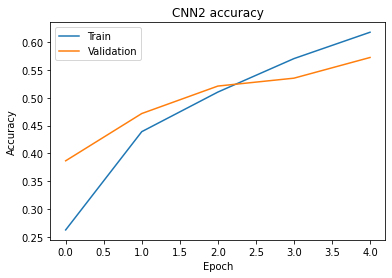

In [30]:
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('CNN2 accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Evaluate the model using testing set

In [31]:
preds = CNN2Model.evaluate(x = X_test, y = Y_test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

5000/5000 [==============================] - 7s 1ms/step
Loss = 1.178193790435791
Test Accuracy = 0.5767999887466431


Print the details of layers in a table with the sizes of its inputs/outputs

In [32]:
CNN2Model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 512)               2097664   
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)              

Change the number of layers and the number of neurons per layer in the MLP

In [54]:
MLPModelv1 = Sequential()

MLPModelv1.add(Flatten(input_shape = X_train.shape[1:]))
MLPModelv1.add(Dense(512, activation='sigmoid', input_shape = X_train.shape[1:]))
MLPModelv1.add(Dense(512, activation='sigmoid'))
MLPModelv1.add(Dense(256, activation='sigmoid'))
MLPModelv1.add(Dense(num_classes, activation='softmax'))

MLPModelv1.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

history4 = MLPModelv1.fit(x = X_train, y = Y_train, validation_data=(X_valid, Y_valid), epochs = 5, batch_size = 32)

preds = MLPModelv1.evaluate(x = X_test, y = Y_test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

Train on 10000 samples, validate on 5000 samples
Epoch 1/5
10000/10000 [==============================] - 26s 3ms/step - loss: 2.1064 - accuracy: 0.2062 - val_loss: 1.9694 - val_accuracy: 0.2744
Epoch 2/5
10000/10000 [==============================] - 24s 2ms/step - loss: 1.9361 - accuracy: 0.2887 - val_loss: 1.9706 - val_accuracy: 0.2708
Epoch 3/5
10000/10000 [==============================] - 24s 2ms/step - loss: 1.8817 - accuracy: 0.3106 - val_loss: 1.8982 - val_accuracy: 0.2974
Epoch 4/5
10000/10000 [==============================] - 23s 2ms/step - loss: 1.8605 - accuracy: 0.3173 - val_loss: 1.8575 - val_accuracy: 0.3282
Epoch 5/5
5000/5000 [==============================] - 1s 229us/step
Loss = 1.782198150253296
Test Accuracy = 0.34060001373291016


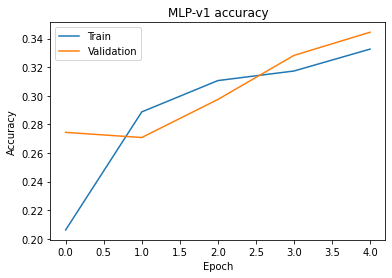

In [55]:
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.title('MLP-v1 accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Change the number of layers and the number of neurons per layer in the MLP

In [52]:
MLPModelv2 = Sequential()

MLPModelv2.add(Flatten(input_shape = X_train.shape[1:]))
MLPModelv2.add(Dense(10, activation='sigmoid', input_shape = X_train.shape[1:]))
MLPModelv2.add(Dense(num_classes, activation='softmax'))

MLPModelv2.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

history5 = MLPModelv2.fit(x = X_train, y = Y_train, validation_data=(X_valid, Y_valid), epochs = 5, batch_size = 32)

preds = MLPModelv2.evaluate(x = X_test, y = Y_test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

Train on 10000 samples, validate on 5000 samples
Epoch 1/5
10000/10000 [==============================] - 5s 544us/step - loss: 2.2149 - accuracy: 0.1703 - val_loss: 2.1314 - val_accuracy: 0.2070
Epoch 2/5
10000/10000 [==============================] - 2s 200us/step - loss: 2.0780 - accuracy: 0.2473 - val_loss: 2.0644 - val_accuracy: 0.2370
Epoch 3/5
10000/10000 [==============================] - 3s 261us/step - loss: 2.0068 - accuracy: 0.2821 - val_loss: 1.9896 - val_accuracy: 0.2854
Epoch 4/5
10000/10000 [==============================] - 3s 269us/step - loss: 1.9456 - accuracy: 0.3056 - val_loss: 1.9328 - val_accuracy: 0.3054
Epoch 5/5
5000/5000 [==============================] - 0s 82us/step
Loss = 1.9083866149902344
Test Accuracy = 0.3125999867916107


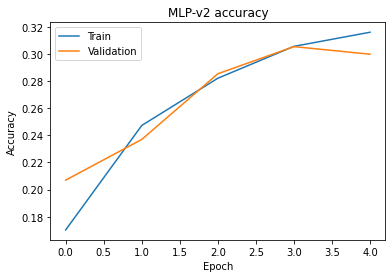

In [53]:
plt.plot(history5.history['accuracy'])
plt.plot(history5.history['val_accuracy'])
plt.title('MLP-v2 accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()